In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [3]:
df = pd.read_csv("./data/kids_csv_ground_truth.csv", delimiter=";");
df.head()

,id,emotion,label
0,0.jpg,angry,0
1,1.jpg,angry,0
2,2.jpg,angry,0
3,3.jpg,angry,0
4,4.jpg,angry,0


In [7]:
with open("./data/adults_results.csv", "r") as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        print(row)

['414.jpg', '2']
['436.jpg', '2']
['406.jpg', '2']
['438.jpg', '2']
['434.jpg', '2']
['435.jpg', '2']
['395.jpg', '2']
['461.jpg', '2']
['440.jpg', '2']
['389.jpg', '2']
['390.jpg', '2']
['428.jpg', '4']
['396.jpg', '2']
['417.jpg', '2']
['460.jpg', '2']
['388.jpg', '2']
['456.jpg', '2']
['420.jpg', '2']
['465.jpg', '2']
['462.jpg', '2']
['429.jpg', '2']
['397.jpg', '2']
['426.jpg', '2']
['433.jpg', '2']
['412.jpg', '2']
['463.jpg', '2']
['439.jpg', '2']
['394.jpg', '2']
['457.jpg', '2']
['422.jpg', '2']
['447.jpg', '2']
['455.jpg', '2']
['387.jpg', '2']
['443.jpg', '2']
['405.jpg', '2']
['430.jpg', '2']
['413.jpg', '2']
['432.jpg', '3']
['393.jpg', '2']
['449.jpg', '2']
['458.jpg', '2']
['410.jpg', '2']
['431.jpg', '3']
['401.jpg', '2']
['409.jpg', '2']
['411.jpg', '2']
['424.jpg', '2']
['446.jpg', '2']
['459.jpg', '2']
['532.jpg', '3']
['504.jpg', '2']
['508.jpg', '3']
['533.jpg', '2']
['488.jpg', '2']
['506.jpg', '2']
['501.jpg', '2']
['537.jpg', '3']
['502.jpg', '2']
['476.jpg', '2

In [10]:
with open("./data/kids_csv_ground_truth.csv", "r") as file:
    csvreader = csv.reader(file)
    for row in csvreader:
        print(row)

['id;emotion;label']
['0.jpg;angry;0']
['1.jpg;angry;0']
['2.jpg;angry;0']
['3.jpg;angry;0']
['4.jpg;angry;0']
['5.jpg;angry;0']
['6.jpg;angry;0']
['7.jpg;angry;0']
['8.jpg;angry;0']
['9.jpg;angry;0']
['10.jpg;angry;0']
['11.jpg;angry;0']
['12.jpg;angry;0']
['13.jpg;angry;0']
['14.jpg;angry;0']
['15.jpg;angry;0']
['16.jpg;angry;0']
['17.jpg;angry;0']
['18.jpg;angry;0']
['19.jpg;angry;0']
['20.jpg;angry;0']
['21.jpg;angry;0']
['22.jpg;angry;0']
['23.jpg;angry;0']
['24.jpg;angry;0']
['25.jpg;angry;0']
['26.jpg;angry;0']
['27.jpg;angry;0']
['28.jpg;angry;0']
['29.jpg;angry;0']
['30.jpg;angry;0']
['31.jpg;angry;0']
['32.jpg;angry;0']
['33.jpg;angry;0']
['34.jpg;angry;0']
['35.jpg;angry;0']
['36.jpg;angry;0']
['37.jpg;angry;0']
['38.jpg;angry;0']
['39.jpg;angry;0']
['40.jpg;angry;0']
['41.jpg;angry;0']
['42.jpg;angry;0']
['43.jpg;angry;0']
['44.jpg;angry;0']
['45.jpg;angry;0']
['46.jpg;angry;0']
['47.jpg;angry;0']
['48.jpg;angry;0']
['49.jpg;angry;0']
['50.jpg;angry;0']
['51.jpg;angry;0']
[

In [11]:
reader = csv.reader(open("./data/kids_csv_ground_truth.csv"), delimiter=";")
sortedlist = sorted(reader, key=lambda row: row[0], reverse=True)

In [12]:
sortedlist[-10:]

[['1005.jpg', 'surprise', '5'],
 ['1004.jpg', 'surprise', '5'],
 ['1003.jpg', 'surprise', '5'],
 ['1002.jpg', 'surprise', '5'],
 ['1001.jpg', 'surprise', '5'],
 ['1000.jpg', 'surprise', '5'],
 ['100.jpg', 'angry', '0'],
 ['10.jpg', 'angry', '0'],
 ['1.jpg', 'angry', '0'],
 ['0.jpg', 'angry', '0']]

In [14]:
reader = csv.reader(open("./data/adults_results.csv"), delimiter=",")
sortedlist_2 = sorted(reader, key=lambda row: row[0], reverse=True)
sortedlist_2[-10:]

[['1005.jpg', '3'],
 ['1004.jpg', '3'],
 ['1003.jpg', '5'],
 ['1002.jpg', '3'],
 ['1001.jpg', '2'],
 ['1000.jpg', '5'],
 ['100.jpg', '0'],
 ['10.jpg', '4'],
 ['1.jpg', '0'],
 ['0.jpg', '0']]

In [15]:
print(len(sortedlist))

1060


In [19]:
df_real = pd.DataFrame(sortedlist)
df_real.columns = df_real.iloc[0]
df_real = df_real[1:]
df_real.head()

,id,emotion,label
1,999.jpg,surprise,5
2,998.jpg,surprise,5
3,997.jpg,surprise,5
4,996.jpg,surprise,5
5,995.jpg,surprise,5


In [24]:
df_pred = pd.DataFrame(sortedlist_2, columns=["id", "label"])
df_pred.head()

,id,label
0,999.jpg,1
1,998.jpg,1
2,997.jpg,3
3,996.jpg,2
4,995.jpg,3


In [25]:
real = df_real["label"]
pred = df_pred["label"]

In [26]:
accuracy = accuracy_score(real, pred)
accuracy

0.421152030217186

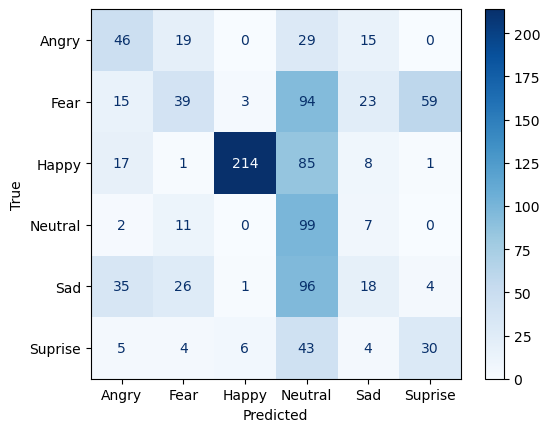

In [28]:
def conf_matrix_and_classification_report(real, pred, path):
    cm = confusion_matrix(real, pred)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['Angry','Fear','Happy', 'Neutral','Sad','Suprise'])
    cmd.plot(cmap=plt.cm.Blues)
    cmd.ax_.set(xlabel='Predicted', ylabel='True')
    plt.show()
    cmd.figure_.savefig(path)
    
conf_matrix_and_classification_report(real,pred,"./results/adul.jpg")

In [29]:
print(classification_report(real, pred))

              precision    recall  f1-score   support

           0       0.38      0.42      0.40       109
           1       0.39      0.17      0.23       233
           2       0.96      0.66      0.78       326
           3       0.22      0.83      0.35       119
           4       0.24      0.10      0.14       180
           5       0.32      0.33      0.32        92

    accuracy                           0.42      1059
   macro avg       0.42      0.42      0.37      1059
weighted avg       0.51      0.42      0.42      1059

